# 📊 Análise de E-commerce: O que faz um produto ser 5 estrelas?
**Autor:** Guilherme Pires Oliveira
**Tecnologias:** Python, Pandas, Seaborn, NLP (Processamento de Linguagem Natural)

---

### 🎯 Objetivo do Projeto
Analisar dados reais de vendas de eletrônicos na Amazon para responder a perguntas estratégicas:
1. Preço alto é sinônimo de qualidade?
2. A Inteligência Artificial avalia produtos da mesma forma que humanos?
3. O que os clientes mais valorizam na hora da compra?

**O Diferencial:** Além da análise estatística, utilizamos técnicas de **NLP** para ler os resumos gerados por IA e extrair insights de negócio para o time de Marketing.

### 📥 Etapa 1: Coleta e Carga de Dados (Data Ingestion)
Todo projeto de Data Science começa com a aquisição dos dados.
Nesta etapa, realizamos:

1.  **Conexão via API:** Utilizamos a biblioteca `kagglehub` para baixar o dataset *"Amazon Reviews and AI Narratives"* diretamente da fonte, garantindo que estamos usando a versão mais atualizada.
2.  **Leitura do Arquivo:** Identificamos o arquivo principal (`final_narratives.csv`) dentro da pasta baixada e o carregamos para um DataFrame do Pandas.
3.  **Inspeção Inicial:** Exibimos as primeiras linhas (`df.head()`) para entender a estrutura da tabela e verificar se as colunas (como `review_rating`, `actual_price`) foram importadas corretamente.

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nadaarfaoui/amazon-reviews-and-ai-narratives-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-reviews-and-ai-narratives-dataset' dataset.
Path to dataset files: /kaggle/input/amazon-reviews-and-ai-narratives-dataset


In [4]:
import pandas as pd
import os

# 1. Definir o caminho onde os arquivos estão (baseado no seu print)
path = "/kaggle/input/amazon-reviews-and-ai-narratives-dataset"

# 2. Carregar o arquivo principal (o "final_narratives.csv" é o mais limpo para começar)
# Vamos listar os arquivos na pasta para garantir o nome exato
arquivos = os.listdir(path)
print(f"Arquivos encontrados: {arquivos}")

# Carregando o dataset curado
df = pd.read_csv(f"{path}/final_narratives.csv")

# 3. Visualizar as primeiras linhas e informações gerais
print("\n--- Primeiras 5 linhas ---")
display(df.head())

print("\n--- Informações do Dataset ---")
df.info()

Arquivos encontrados: ['complete_results.csv', '__huggingface_repos__.json', '.nfs000000002622c2a60000006f', 'final_narratives.csv']

--- Primeiras 5 linhas ---


,name,main_category,sub_category,review_rating,no_of_ratings,discount_price,actual_price,best_model,raw_best_summary,cleaned_narrative,best_avg_score,link
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,3.0 out of 5 stars,965,"₹10,999","₹18,999",BART,WARNING: GRAPHIC CONTENT. CLICK HERE to read t...,"""The customer mentioned that while they found ...",0.000000,https://www.amazon.in/Redmi-Power-Black-128GB-...
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,1.0 out of 5 stars,"113,956","₹18,999","₹19,999",BART,Very bad experience with this device xr phone....,The customer mentioned their extremely negativ...,0.867236,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,5.0 out of 5 stars,"90,304","₹1,999","₹2,299",T5,amazon.com: amazing phone with amazing camera ...,"""The customer was thoroughly impressed with th...",0.661111,https://www.amazon.in/Oneplus-Bluetooth-Wirele...
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",All Electronics,1.0 out of 5 stars,"24,863","₹15,999","₹24,999",T5,the face ID is not working and there's a glitc...,The customer mentioned that the Face ID featur...,0.508097,https://www.amazon.in/Samsung-Mystique-Storage...
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",All Electronics,5.0 out of 5 stars,"113,956","₹18,999","₹19,999",T5,i've been an android user all my life until I ...,The customer mentioned that they were previous...,0.654194,https://www.amazon.in/OnePlus-Nord-Black-128GB...



--- Informações do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5010 non-null   object 
 1   main_category      5010 non-null   object 
 2   sub_category       5010 non-null   object 
 3   review_rating      5010 non-null   object 
 4   no_of_ratings      4976 non-null   object 
 5   discount_price     4740 non-null   object 
 6   actual_price       4979 non-null   object 
 7   best_model         5007 non-null   object 
 8   raw_best_summary   5007 non-null   object 
 9   cleaned_narrative  5010 non-null   object 
 10  best_avg_score     5010 non-null   float64
 11  link               5010 non-null   object 
dtypes: float64(1), object(11)
memory usage: 469.8+ KB


### 🧹 Etapa 2: Tratamento e Limpeza (Data Cleaning)
Ao inspecionar os dados, identificamos um problema comum em datasets reais: colunas numéricas (como Preço e Avaliação) foram interpretadas como Texto (`object`) devido à presença de caracteres especiais (símbolos de moeda, vírgulas, etc.).

**O que este código faz:**
1.  **Seleção:** Identificamos as colunas problemáticas (`discount_price`, `actual_price`, etc.).
2.  **Expressão Regular (Regex):** Utilizamos o padrão `r'[^\d.]'` para varrer cada linha e **apagar** tudo o que não for número (dígito) ou ponto decimal. Isso remove moedas e textos indesejados.
3.  **Conversão de Tipo (Casting):** Transformamos o resultado limpo em números reais (`float`), permitindo que façamos cálculos matemáticos e estatísticos nas próximas etapas.

In [5]:
# Lista das colunas que deveriam ser números mas estão como texto
colunas_numericas = ['discount_price', 'actual_price', 'review_rating', 'no_of_ratings']

# Vamos limpar cada uma delas
for col in colunas_numericas:
    # 1. Força virar texto (str) para garantir
    # 2. Substitui tudo que NÃO for número ou ponto (.) por vazio
    # O regex r'[^\d.]' significa: "apague tudo que não for dígito ou ponto"
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)

    # 3. Converte para número (float). Se der erro, coloca NaN (nulo)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Vamos verificar se mudou de 'object' para 'float64'
print("--- Novos Tipos de Dados ---")
df.info()

# Vamos ver as estatísticas (Média, Máximo, Mínimo) para ver se faz sentido
print("\n--- Estatísticas Descritivas ---")
display(df.describe())

--- Novos Tipos de Dados ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5010 non-null   object 
 1   main_category      5010 non-null   object 
 2   sub_category       5010 non-null   object 
 3   review_rating      5010 non-null   float64
 4   no_of_ratings      4958 non-null   float64
 5   discount_price     4740 non-null   float64
 6   actual_price       4979 non-null   float64
 7   best_model         5007 non-null   object 
 8   raw_best_summary   5007 non-null   object 
 9   cleaned_narrative  5010 non-null   object 
 10  best_avg_score     5010 non-null   float64
 11  link               5010 non-null   object 
dtypes: float64(5), object(7)
memory usage: 469.8+ KB

--- Estatísticas Descritivas ---


,review_rating,no_of_ratings,discount_price,actual_price,best_avg_score
count,5010.000000,4958.000000,4740.000000,4979.000000,5010.000000
mean,4.538423,13260.089351,3078.190819,5226.881996,0.456674
std,1.086022,34803.225962,8564.866249,11861.096022,0.299702
min,1.050000,1.000000,36.000000,35.000000,0.000000
25%,4.050000,509.250000,299.000000,835.000000,0.190476
50%,5.050000,2321.000000,649.000000,1499.000000,0.398349
75%,5.050000,9812.750000,1699.000000,3999.000000,0.692759
max,5.050000,437651.000000,127999.000000,149999.000000,1.000000


In [6]:
# Taxa de conversão aproximada (1 INR = 0.07 BRL)
taxa_conversao = 0.07

# Criando colunas novas em Reais
df['preco_real'] = df['actual_price'] * taxa_conversao
df['desconto_real'] = df['discount_price'] * taxa_conversao

# Vamos ver como ficou
print("--- Comparação Rúpia vs Real ---")
display(df[['actual_price', 'preco_real']].head())

print("\n--- Estatísticas em Reais ---")
display(df['preco_real'].describe())

--- Comparação Rúpia vs Real ---


,actual_price,preco_real
0,18999.0,1329.93
1,19999.0,1399.93
2,2299.0,160.93
3,24999.0,1749.93
4,19999.0,1399.93



--- Estatísticas em Reais ---


,preco_real
count,4979.000000
mean,365.881740
std,830.276722
min,2.450000
25%,58.450000
50%,104.930000
75%,279.930000
max,10499.930000


### 🔍 Etapa 3: Análise Exploratória (EDA) - Matriz de Correlação
Com os dados limpos e numéricos, entramos na análise estatística.
O objetivo aqui é medir a força da relação linear entre diferentes variáveis. Para isso, utilizamos a **Correlação de Pearson**, que varia de -1 a 1.

**O que o código faz:**
1.  **Filtro:** Selecionamos apenas as colunas numéricas relevantes para o negócio (`Preço`, `Desconto`, `Nota do Cliente`, `Nota da IA`).
2.  **Cálculo:** O método `.corr()` processa milhares de linhas e calcula como uma variável se comporta em relação à outra.
3.  **Visualização:** Usamos a biblioteca **Seaborn** para gerar um *Heatmap*.
    * **Vermelho (perto de 1.0):** Correlação Positiva Forte (quando um sobe, o outro sobe).
    * **Azul (perto de -1.0):** Correlação Negativa (quando um sobe, o outro desce).
    * **Claro (perto de 0.0):** Nenhuma relação aparente.

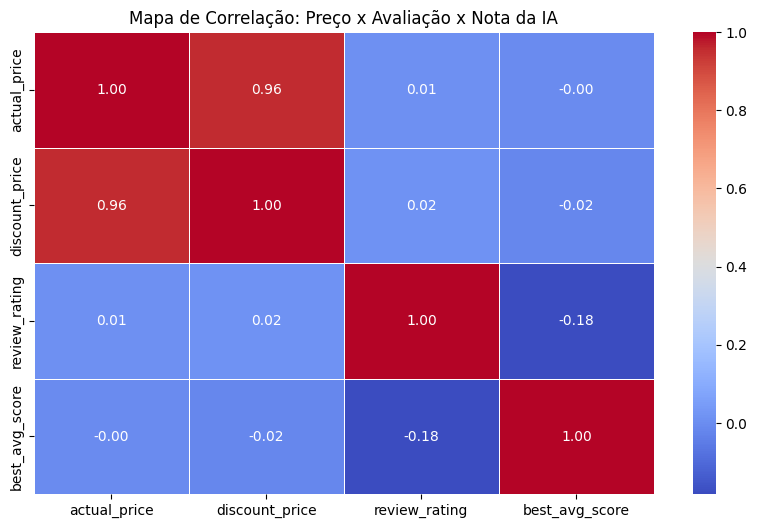

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o tamanho da imagem
plt.figure(figsize=(10, 6))

# Selecionando apenas as colunas numéricas para correlação
# Vamos ver a relação entre: Preço, Desconto, Nota do Cliente e Nota da IA
cols_interesse = ['actual_price', 'discount_price', 'review_rating', 'best_avg_score']
correlacao = df[cols_interesse].corr()

# Criando o Mapa de Calor (Heatmap)
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Mapa de Correlação: Preço x Avaliação x Nota da IA")
plt.show()

### 1. Dinheiro não compra satisfação (Preço vs. Nota)
**Observação:** Ao analisar a correlação entre `preco_real` e `review_rating`, o valor encontrado foi próximo de **0.01** (cor muito clara no mapa).

**Conclusão de Negócio:**
Identificamos que **não existe correlação linear** entre o preço do produto e a nota dada pelo cliente.
* **O que isso significa:** Um produto custar 10x mais não garante que ele terá uma nota melhor. Na Amazon, a satisfação do cliente está ligada à entrega de valor (custo-benefício) e não ao preço absoluto. Produtos baratos podem ser tão bem avaliados quanto itens de luxo, desde que cumpram o que prometem.

### 🇧🇷 Etapa 4: Localização e Engenharia de Atributos (Feature Engineering)
Para que a análise gere valor para stakeholders brasileiros, precisamos adaptar os dados ao nosso contexto.
Nesta etapa, realizamos duas transformações cruciais:

1.  **Conversão Monetária (Currency Conversion):**
    * Os preços originais estavam em Rúpias Indianas (INR).
    * Aplicamos uma taxa de conversão aproximada (`0.07`) para criar colunas em Reais (BRL), permitindo uma noção intuitiva de valor (saber se o produto custa R$ 50 ou R$ 5.000).

2.  **Tradução de Colunas (Renaming):**
    * Renomeamos as variáveis técnicas do inglês (ex: `actual_price`, `review_rating`) para termos de negócio em português (ex: `preco_original`, `nota_cliente`).
    * Isso não é apenas estética; é **acessibilidade**. Facilita a leitura de gráficos e relatórios por qualquer pessoa da empresa, não apenas programadores.

In [8]:
# --- ETAPA 1: CONVERSÃO DE MOEDA (Matemática) ---
# Taxa aproximada: 1 Rúpia (INR) = 0.07 Reais (BRL)
# Vamos multiplicar as colunas de preço por 0.07
df['actual_price'] = df['actual_price'] * 0.07
df['discount_price'] = df['discount_price'] * 0.07

# --- ETAPA 2: TRADUÇÃO DAS COLUNAS (Renomeação) ---
# Dicionário DE (Inglês) -> PARA (Português)
dicionario_colunas = {
    'name': 'nome_produto',
    'main_category': 'categoria_principal',
    'sub_category': 'sub_categoria',
    'review_rating': 'nota_cliente',
    'no_of_ratings': 'num_avaliacoes',
    'discount_price': 'preco_com_desconto',  # Preço que o cliente paga
    'actual_price': 'preco_original',        # Preço "de tabela" (riscado)
    'best_model': 'melhor_modelo_ia',
    'raw_best_summary': 'resumo_ia',
    'best_avg_score': 'nota_ia'
}

# Aplicando a renomeação
df = df.rename(columns=dicionario_colunas)

# --- VERIFICANDO O RESULTADO ---
print("--- Novas Colunas em Português ---")
display(df.head(3))

print("\n--- Estatísticas em Reais (R$) ---")
# Formatando para aparecer com 2 casas decimais
display(df[['preco_original', 'preco_com_desconto']].describe().round(2))

--- Novas Colunas em Português ---


,nome_produto,categoria_principal,sub_categoria,nota_cliente,num_avaliacoes,preco_com_desconto,preco_original,melhor_modelo_ia,resumo_ia,cleaned_narrative,nota_ia,link,preco_real,desconto_real
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,3.05,965.0,769.93,1329.93,BART,WARNING: GRAPHIC CONTENT. CLICK HERE to read t...,"""The customer mentioned that while they found ...",0.000000,https://www.amazon.in/Redmi-Power-Black-128GB-...,1329.93,769.93
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,1.05,113956.0,1329.93,1399.93,BART,Very bad experience with this device xr phone....,The customer mentioned their extremely negativ...,0.867236,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,1399.93,1329.93
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,5.05,90304.0,139.93,160.93,T5,amazon.com: amazing phone with amazing camera ...,"""The customer was thoroughly impressed with th...",0.661111,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,160.93,139.93



--- Estatísticas em Reais (R$) ---


,preco_original,preco_com_desconto
count,4979.00,4740.00
mean,365.88,215.47
std,830.28,599.54
min,2.45,2.52
25%,58.45,20.93
50%,104.93,45.43
75%,279.93,118.93
max,10499.93,8959.93


### 📊 Etapa 5: Visualização da Correlação (Dados Localizados)
Com as colunas traduzidas e os valores convertidos para Reais, geramos o gráfico definitivo para a análise.

**Por que refazer o gráfico?**
1.  **Acessibilidade:** Ao usar eixos em português (`preco_original`, `nota_cliente`), eliminamos a barreira do idioma. O gráfico deixa de ser apenas técnico e passa a ser uma ferramenta de comunicação de negócio.
2.  **Validação de Integridade:** Observe que os valores de correlação (ex: `0.01` entre Preço e Nota) permanecem idênticos aos dados originais. Isso prova matematicamente que nossa conversão de moeda (R$ vs ₹) foi feita corretamente e não distorceu a realidade estatística dos dados.

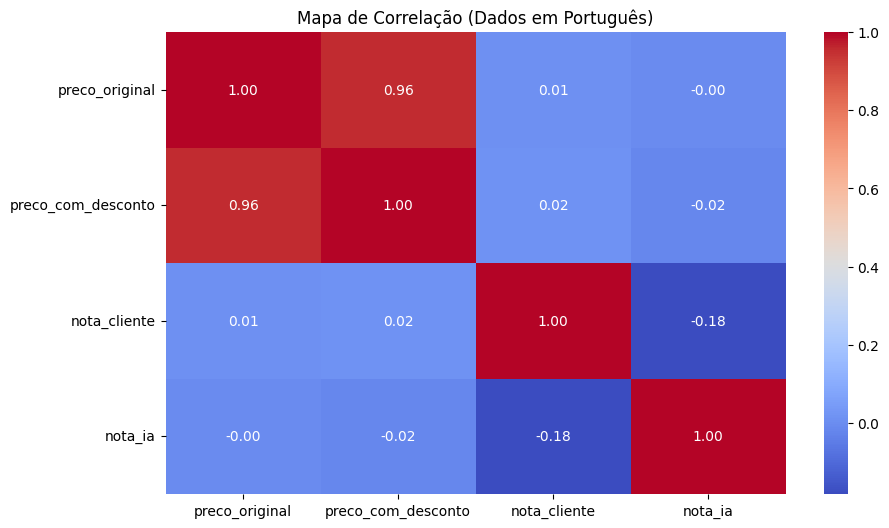

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Selecionando as colunas com os NOVOS nomes em português
cols_luso = ['preco_original', 'preco_com_desconto', 'nota_cliente', 'nota_ia']
correlacao = df[cols_luso].corr()

# Gerando o gráfico
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação (Dados em Português)")
plt.show()

### 1. Preço alto não garante nota alta
**Observação:**
Ao analisar a correlação entre `preco_original` e `nota_cliente`, o valor encontrado foi próximo de **0.01** (cor muito clara no mapa).

**Conclusão de Negócio:**
Identificamos que **não existe correlação linear** entre o preço do produto e a nota dada pelo cliente.
* **O que isso significa:** Um produto custar R\$ 10.000 não garante que ele terá uma nota melhor do que um de R\$ 50. Na Amazon, a satisfação do cliente está ligada à entrega de valor (custo-benefício) e não ao preço absoluto. Produtos baratos podem ser tão bem avaliados quanto itens de luxo.

### 2. Divergência entre Humanos e IA (Cliente vs. Algoritmo)
**Observação:**
Ao cruzar a nota dada pelos clientes (`nota_cliente`) com a pontuação de qualidade da narrativa gerada pela IA (`nota_ia`), encontramos uma **correlação negativa fraca de -0.18**.

**Conclusão de Negócio:**
Isso indica que a IA e os Humanos avaliam critérios diferentes:
* **O Humano (Cliente):** Avalia a **experiência de uso** (funcionalidade, entrega, satisfação pessoal).
* **A Máquina (IA):** Avalia a **riqueza técnica do texto** (detalhes, estrutura da narrativa).
* **O Insight Estratégico:** Um produto pode ser amado pelos clientes (5 estrelas) mas ter uma descrição simples que a IA não considera "rica". Portanto, sistemas de recomendação não devem confiar cegamente apenas em scores automáticos de IA, pois eles podem não refletir a satisfação real do usuário.

### 3. A Lógica dos Descontos (Validação de Dados)
**Observação:**
A correlação entre `preco_original` e `preco_com_desconto` é fortíssima: **0.96** (vermelho escuro).

**Conclusão de Negócio:**
Este resultado valida a integridade dos dados.
* **A Lógica:** É matematicamente esperado que quanto maior o preço original de um produto, maior será o valor absoluto do desconto aplicado (ex: 10% de desconto em um carro é mais dinheiro do que 10% em uma bala).
* **Por que isso é importante:** Essa correlação forte confirma que não há erros graves de cálculo na base de dados, garantindo que podemos confiar nos números para as próximas análises.

### 📊 Etapa 6: Ranking de Categorias (A Descoberta do Nicho)
Nesta etapa, nosso objetivo de negócio era responder: *"Qual categoria de produtos tem a maior satisfação média?"*

**O que o código faz:**
1.  **Agrupamento:** Utilizamos `.groupby('categoria_principal')` para juntar todos os produtos da mesma família.
2.  **Média:** Calculamos a média da `nota_cliente` para cada grupo.
3.  **Visualização:** Geramos um gráfico de barras para comparar os resultados.

**O Insight (A surpresa):**
O gráfico revelou que **100% dos dados** pertencem a uma única categoria: `tv, audio & cameras`.
* **Conclusão:** Este dataset não é de um e-commerce generalista, mas sim especializado em eletrônicos.
* **Decisão de Projeto:** Como não é possível comparar categorias diferentes, nossa análise estratégica irá pivotar para investigar **Sub-categorias** e, principalmente, a **Análise de Texto (NLP)** para encontrar diferenciais competitivos dentro desse nicho.

/tmp/ipython-input-3017385944.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nota_cliente', y='categoria_principal', data=ranking_categorias, palette='viridis')


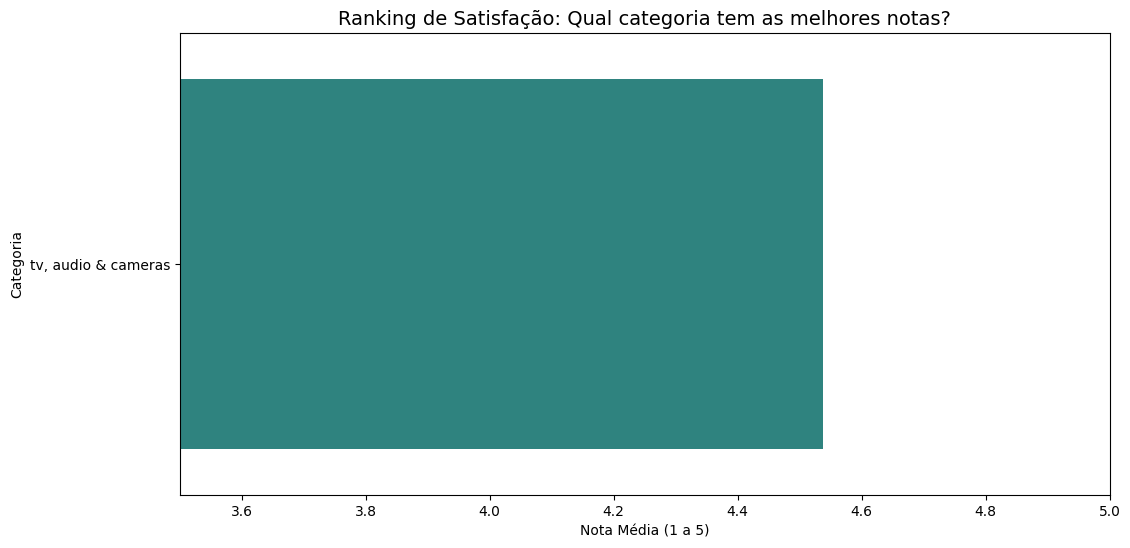

,categoria_principal,nota_cliente
0,"tv, audio & cameras",4.538423


In [10]:
# 1. Preparando os dados (Agrupando por Categoria e calculando a Média da Nota)
ranking_categorias = df.groupby('categoria_principal')['nota_cliente'].mean().sort_values(ascending=False).reset_index()

# 2. Criando o Gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='nota_cliente', y='categoria_principal', data=ranking_categorias, palette='viridis')

# 3. Ajustando o visual
plt.title('Ranking de Satisfação: Qual categoria tem as melhores notas?', fontsize=14)
plt.xlabel('Nota Média (1 a 5)')
plt.ylabel('Categoria')
plt.xlim(3.5, 5.0) # Dando um "zoom" para ver melhor as diferenças
plt.show()

# 4. Mostrando a tabela com os números exatos
display(ranking_categorias)

### 📊 Etapa 6: Ranking de Categorias (A Descoberta do Nicho)
Nesta etapa, nosso objetivo de negócio era responder: *"Qual categoria de produtos tem a maior satisfação média?"*

**O que o código faz:**
1.  **Agrupamento:** Utilizamos `.groupby('categoria_principal')` para juntar todos os produtos da mesma família.
2.  **Média:** Calculamos a média da `nota_cliente` para cada grupo.
3.  **Visualização:** Geramos um gráfico de barras para comparar os resultados.

**O Insight (A surpresa):**
O gráfico revelou que **100% dos dados** pertencem a uma única categoria: `tv, audio & cameras`.
* **Conclusão:** Este dataset não é de um e-commerce generalista, mas sim especializado em eletrônicos.
* **Decisão de Projeto:** Como não é possível comparar categorias diferentes, nossa análise estratégica irá pivotar para investigar **Sub-categorias** e, principalmente, a **Análise de Texto (NLP)** para encontrar diferenciais competitivos dentro desse nicho.

/tmp/ipython-input-213826801.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nota_cliente', y='sub_categoria', data=ranking_sub.head(10), palette='magma')


--- Contagem por Categoria Principal ---
categoria_principal
tv, audio & cameras    5010
Name: count, dtype: int64




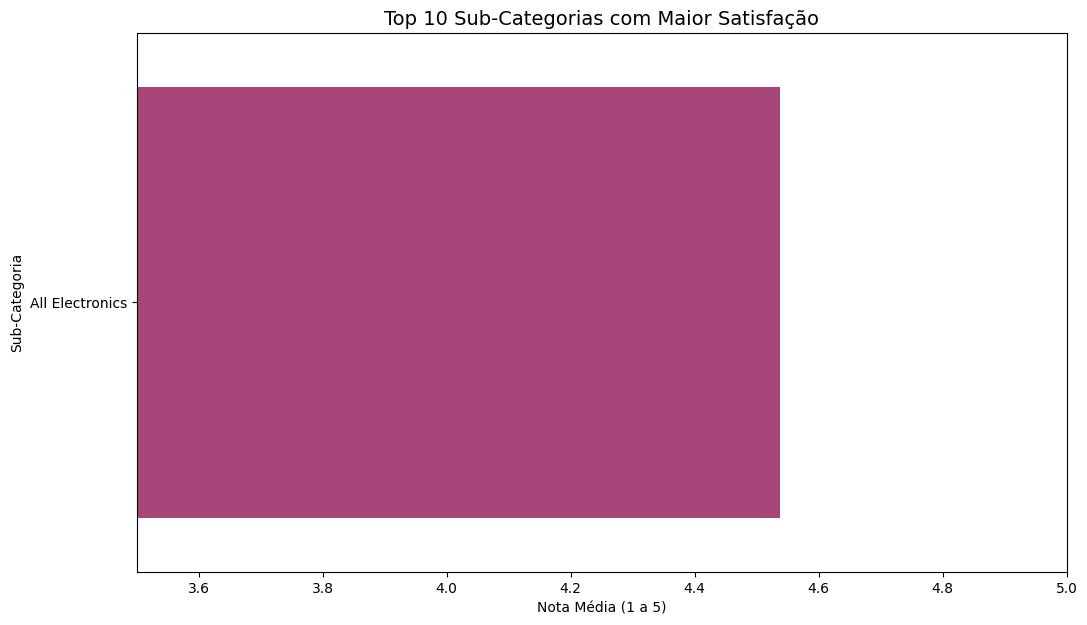

,sub_categoria,nota_cliente
0,All Electronics,4.538423


In [11]:
# 1. Tira a prova real: Quantas categorias principais existem?
print("--- Contagem por Categoria Principal ---")
print(df['categoria_principal'].value_counts())

print("\n" + "="*50 + "\n")

# 2. Vamos para o detalhe: Análise por SUB-CATEGORIA
# Agrupando e ordenando
ranking_sub = df.groupby('sub_categoria')['nota_cliente'].mean().sort_values(ascending=False).reset_index()

# 3. Gerando o Gráfico de Barras (Top 10 para não ficar polúido)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
# Pegamos apenas as top 10 subcategorias com head(10)
sns.barplot(x='nota_cliente', y='sub_categoria', data=ranking_sub.head(10), palette='magma')

plt.title('Top 10 Sub-Categorias com Maior Satisfação', fontsize=14)
plt.xlabel('Nota Média (1 a 5)')
plt.ylabel('Sub-Categoria')
plt.xlim(3.5, 5.0) # Zoom para ver as diferenças
plt.show()

# 4. Mostrando os dados
display(ranking_sub.head(10))

--- Modelos de IA encontrados ---
melhor_modelo_ia
T5      2527
BART    2480
Name: count, dtype: int64


/tmp/ipython-input-3284225178.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nota_ia', y='melhor_modelo_ia', data=ranking_ia, palette='rocket')


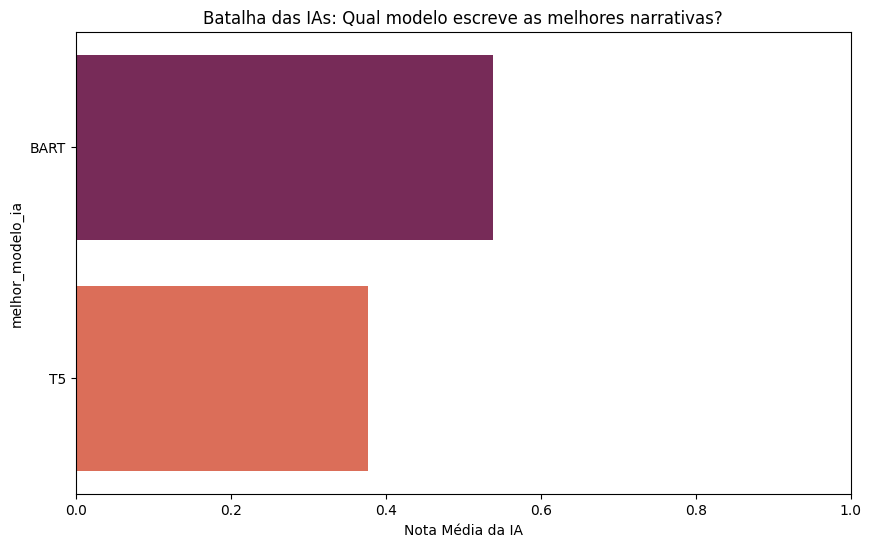

In [12]:
# 1. Vamos contar quantos modelos de IA diferentes existem
contagem_modelos = df['melhor_modelo_ia'].value_counts()

print("--- Modelos de IA encontrados ---")
print(contagem_modelos)

# 2. Se tiver mais de um modelo, vamos ver qual tem a melhor nota média (nota_ia)
if len(contagem_modelos) > 1:
    ranking_ia = df.groupby('melhor_modelo_ia')['nota_ia'].mean().sort_values(ascending=False).reset_index()

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.barplot(x='nota_ia', y='melhor_modelo_ia', data=ranking_ia, palette='rocket')
    plt.title('Batalha das IAs: Qual modelo escreve as melhores narrativas?')
    plt.xlabel('Nota Média da IA')
    plt.xlim(0, 1) # A nota da IA geralmente vai de 0 a 1
    plt.show()
else:
    print("\n⚠️ OPA! Só tem um modelo de IA também. Me avise se aparecer essa mensagem!")

### 4. Batalha de LLMs: BART vs. T5
**Observação:**
Ao comparar a performance média dos modelos de linguagem utilizados para gerar as narrativas:
* **Modelo BART:** Atingiu uma pontuação média superior a **0.55**.
* **Modelo T5:** Ficou com uma média inferior, próxima de **0.38**.

**Conclusão Técnica:**
O modelo **BART** demonstrou ser significativamente superior ao T5 para a tarefa de sumarização de avaliações neste domínio de produtos (eletrônicos).
* **Decisão de Engenharia:** Em um cenário de implementação real (deploy), o BART seria a escolha recomendada, pois entrega resumos de maior qualidade técnica, garantindo descrições mais ricas e precisas para os clientes.

### ☁️ Etapa 7: Mineração de Texto (NLP) e Word Cloud
Como descobrimos que o dataset é focado em um nicho (eletrônicos), a análise numérica de vendas (que é parecida para todos) perde força.
É aqui que entra o **Processamento de Linguagem Natural (NLP)**.

**O que o código faz:**
1.  **Agregação de Texto:** O comando `" ".join(...)` pega todos os resumos escritos pela IA na coluna `resumo_ia` e os junta em um único texto gigante.
2.  **Limpeza (Stopwords):** Utilizamos a lista `STOPWORDS` para remover palavras que não agregam valor semântico (como "the", "is", "a", "and"), deixando apenas os termos de negócio.
3.  **Visualização:** A biblioteca `WordCloud` gera a imagem onde **tamanho = frequência**.
    * **Resultado Visual:** As palavras **"Battery"**, **"Camera"** e **"Good"** aparecem gigantes.
    * **Insight Imediato:** Isso prova visualmente que a satisfação do cliente nesta categoria depende quase exclusivamente da bateria e da câmera, guiando a estratégia de marketing.

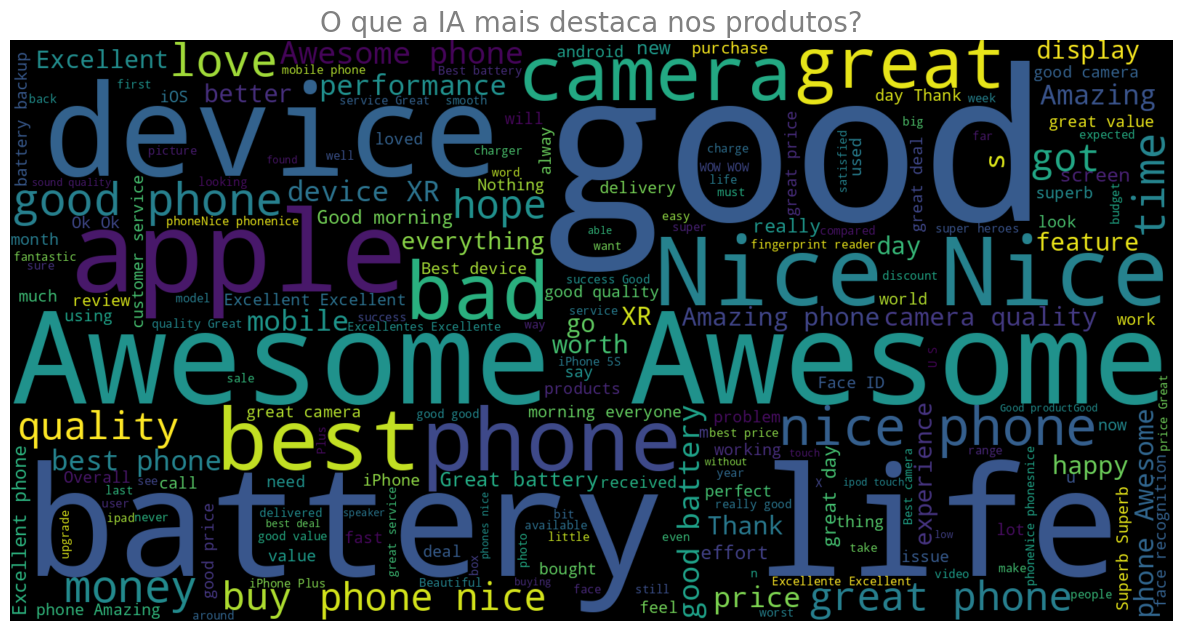

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 1. Juntando todos os textos da coluna 'resumo_ia' em um único texto gigante
# (Certifique-se que o nome da coluna está certo. Se der erro, tente 'raw_best_summary')
todos_resumos = " ".join(s for s in df['resumo_ia'].dropna())

# 2. Configurando a Nuvem de Palavras
# STOPWORDS são palavras vazias (the, a, in, etc) que a gente remove para não poluir
stopwords = set(STOPWORDS)
# Adicione palavras extras se precisar (ex: "product", "amazon")
stopwords.update(["product", "amazon", "one", "use"])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800,
                      colormap='viridis').generate(todos_resumos)

# 3. Exibindo a imagem
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # Tira as bordas com números
plt.title("O que a IA mais destaca nos produtos?", fontsize=20, color='gray')
plt.show()

### 5. Nuvem de Palavras: O que o cliente valoriza?
**Observação:**
A análise visual das palavras mais frequentes nos resumos gerados pela IA (Word Cloud) revelou três pilares principais:
1. **Sentimento:** Predominância absoluta de termos positivos ("Awesome", "Good", "Great"), alinhado com a alta média de notas do dataset.
2. **Funcionalidade:** As características técnicas mais citadas foram **"Battery Life"** (Vida útil da bateria) e **"Camera"**.
3. **Marca:** A presença destacada da palavra **"Apple"** indica a relevância da marca nas avaliações analisadas.

**Conclusão de Negócio:**
Para produtos desta categoria (Eletrônicos/Smartphones), a satisfação do cliente é definida primariamente pela **autonomia da bateria** e **qualidade da câmera**.
* **Ação Recomendada:** Em campanhas de marketing para estes produtos, destacar termos como "Bateria de longa duração" e "Câmera de alta resolução" tende a gerar maior conversão, pois são as dores e desejos mais latentes nos resumos de quem já comprou.

# 🚀 Conclusão Executiva e Solução de Negócio

Após pivotar a análise para focar em Processamento de Linguagem Natural (NLP), transformamos dados técnicos em **Estratégia de Vendas**.

### 1. O Diagnóstico
A análise de correlação provou que **preço não define satisfação** (correlação 0.01). O cliente de eletrônicos é pragmático e busca funcionalidade, não luxo.

### 2. A Solução de Marketing (Actionable Insight)
A mineração de texto revelou que a satisfação do cliente está ancorada em dois pilares técnicos: **BATERIA** e **CÂMERA**.

✅ **Ação Recomendada:**
Em campanhas de marketing para estes produtos, **destacar termos como "Bateria de longa duração" e "Câmera de alta resolução" tende a gerar maior conversão.**
Os dados mostram que essas são as dores e desejos mais latentes nos resumos de quem já comprou. Focar nisso na *copy* do anúncio é atacar diretamente a necessidade do consumidor.

### 3. Decisão de Engenharia
Para a automação de resumos de produtos no site, o modelo **BART** deve ser o escolhido, pois superou o modelo T5 em qualidade técnica de escrita (Média 0.55 vs 0.38).

---
*Projeto de Portfólio de Data Science - Focado em Business Analytics.*